In [2]:
import os
print(os.listdir())

['Housing project.ipynb', 'housingData-Real.csv', '.ipynb_checkpoints']


In [4]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#import dataset
housingDf = pd.read_csv('./housingData-Real.csv')

In [6]:
housingDf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
housingDf.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [9]:
housingDf['sqft_basement'].nunique()

306

In [10]:
livingSqft = housingDf['sqft_living']
price = housingDf['price']

In [19]:
X = np.array(livingSqft).reshape(-1, 1) #reshape part will get clear as time progresses.

In [41]:
y = np.array(price)

In [21]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [23]:
#Split into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [24]:
#Linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [25]:
#Train the regressor
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
#Test run the predictor
predictor_y = regressor.predict(X_test)

In [27]:
predictor_y

array([381596.74200795, 696481.57763443, 589645.65126116, ...,
       322555.83532799, 305687.004848  , 555907.99030118])

Text(0,0.5,'Price')

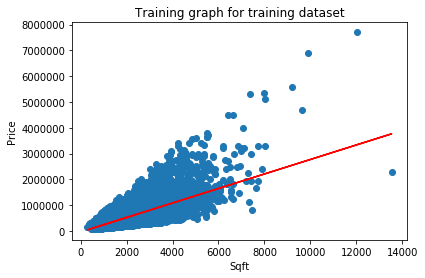

In [39]:
#plotting graph for training dataset
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Training graph for training dataset')
plt.xlabel('Sqft')
plt.ylabel('Price')

Text(0,0.5,'Price')

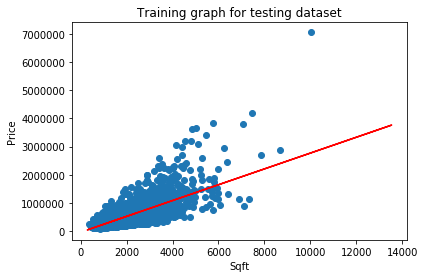

In [38]:
#plotting graph for testing dataset
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Training graph for testing dataset')
plt.xlabel('Sqft')
plt.ylabel('Price')